In [1]:
import pandas as pd
import numpy as np
#Packages below are required only for visualization
import matplotlib.pyplot as plt
from scipy import stats

### Rergression estimator of the target class area for simple random sampling, from Tyukavina et al. (in review) "Options for global sampling of geographic data"

#### Example of input data

In [2]:
#Define the area of the sampling region (e.g. in km²)
Atot = 16775135.2
#Define total number of sampling units
N = 27374
#Define population mean of the proportion (from 0 to 1) of auxiliary class
X = 0.028408947

In [3]:
#Read sample interpretation table with columns:
#"yi" - proportion (from 0 to 1) of the target class from the area of the sampled unit (derived from sample interpretation);
#"xi" - proportion (from 0 to 1) of the auxiliary class from the area of the sampled unit (derived from a wall-to-wall map);

data = pd.read_csv('5.2.Sample_data.txt', sep ='\t')

In [4]:
data.head().style.hide_index()

yi,xi
0.135802,0.009753
0.220494,0.040618
0.007901,0.004321
0.081481,0.024692
0.001605,0.000247


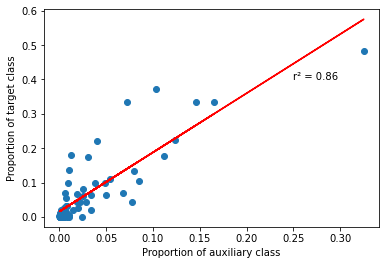

In [5]:
#Visualize linear regression between y and x

plt.scatter(data.xi,data.yi)
plt.xlabel('Proportion of auxiliary class')
plt.ylabel('Proportion of target class')

linreg = stats.linregress(data.xi, data.yi)
plt.plot(data.xi, linreg.intercept + linreg.slope*data.xi, 'r')

plt.text(0.25,0.4, 'r² = %0.2f' % linreg.rvalue)
plt.show()

#### Functions to produce regression estimate of target class area and its standard error

In [6]:
def estimate_area_reg(df: pd.DataFrame, Atot: float, X: float) -> float:
    """ 
    Function to produce regression estimator of target class area from sample refernce values 
    for sampling of units (pixels/polygons) with equal area, simple random sampling.
    ~~~
    Input variables:
    Atot (area of the sampling region, e.g. in km²)
    X (population mean of the proportion (from 0 to 1) of auxiliary class)
    
    Input dataframe with number of lines equal the number of sample pixels/polygons,
    and the following columns:
    "yi" (proportion (from 0 to 1) of the target class from the area of the sampled unit (derived from sample interpretation);
    "xi" (proportion (from 0 to 1) of the auxiliary class from the area of the sampled unit (derived from a wall-to-wall map);
    ~~~
    Returns estimated target class area in units of Atot, 
    ~~~
    From Tyukavina et al. (in review) "Options for global sampling of geographic data"
    Appendix, equations 36-38
    """
    df['y-ymean'] = df['yi'] - df['yi'].mean()
    df['x-ymean'] = df['xi'] - df['xi'].mean()
    
    #Equation 37
    b = (df['y-ymean'] * df['x-ymean']).sum() / (df['x-ymean'] * df['x-ymean']).sum()
    
    #Equation 36
    Yest = df['yi'].mean() + b * (X - df['xi'].mean())
    
    # Equation 38
    area = Yest * Atot

    return area

In [7]:
estimate_area_reg(data, Atot, X)

1086017.079197921

In [8]:
def estimate_area_SE_reg(df: pd.DataFrame, Atot: float, N: int) -> float:
    """ 
    Function to estimate SE of the regression estimate of target class area from sample refernce values 
    for sampling of units (pixels/polygons) with equal area, simple random sampling.
    ~~~
    Input variables:
    Atot (area of the sampling region, e.g. in km²)
    N (total number of sampling units)
    
    Input dataframe with number of lines equal the number of sample pixels/polygons,
    and the following columns:
    "yi" (proportion (from 0 to 1) of the target class from the area of the sampled unit (derived from sample interpretation);
    "xi" (proportion (from 0 to 1) of the auxiliary class from the area of the sampled unit (derived from a wall-to-wall map);
    ~~~
    Returns estimated standard error of target class area in units of Atot, 
    ~~~
    From Tyukavina et al. (in review) "Options for global sampling of geographic data"
    Appendix, equations 39 and 40
    """
    df['y-ymean'] = df['yi'] - df['yi'].mean()
    df['x-ymean'] = df['xi'] - df['xi'].mean()
    
    #Equation 39
    ForVar = (df['y-ymean'] * df['y-ymean']).sum() - (df['y-ymean'] * df['x-ymean']).sum() * (df['y-ymean'] * df['x-ymean']).sum() / (df['x-ymean'] * df['x-ymean']).sum()
    n = df['yi'].count()
    Var = ForVar * (1 - n/N) / (n * (n-2))
 
    # Equation 40
    SE = np.sqrt(Var) * Atot

    return SE

In [9]:
estimate_area_SE_reg(data, Atot, N)

106327.70099918565

#### Direct estimate of the target class area (for comparison with regression estimate)

In [10]:
def estimate_area_dir(df: pd.DataFrame, Atot: float) -> float:
    """ 
    Function to produce direct estimator of target class area from sample refernce values 
    for sampling of units (pixels/polygons) with equal area, simple random sampling.
    ~~~
    Input variables:
    Atot (area of the sampling region, e.g. in km²)
    Input dataframe with number of lines equal the number of sample pixels/polygons,
    and the following column:
    "yi" (proportion (from 0 to 1) of the target class from the area of the sampled unit (derived from sample interpretation)
    ~~~
    Returns estimated target class area in units of Atot, 
    ~~~
    From Cochran, 1977 (Sampling techniques), Chapter 2
    """
    area = df['yi'].mean() * Atot

    return area

In [11]:
estimate_area_dir(data, Atot)

1116448.8543194276

In [12]:
def estimate_area_SE_dir(df: pd.DataFrame, Atot: float, N: int) -> float:
    """ 
    Function to estimate SE of the direct estimate of target class area from sample refernce values 
    for sampling of units (pixels/polygons) with equal area, simple random sampling.
    ~~~
    Input variables:
    Atot (area of the sampling region, e.g. in km²)
    N (total number of sampling units)
    
    Input dataframe with number of lines equal the number of sample pixels/polygons,
    and the following columns:
    "yi" (proportion (from 0 to 1) of the target class from the area of the sampled unit (derived from sample interpretation)
    ~~~
    Returns estimated standard error of target class area in units of Atot, 
    ~~~
    From Cochran, 1977 (Sampling techniques), equation 2.20
    """
    n = df['yi'].count()
    Var = df['yi'].var(ddof=1) / n * (1 - n/N)
    
    SE = np.sqrt(Var) * Atot

    return SE

In [13]:
estimate_area_SE_dir(data, Atot, N)

205535.11323542707